<a href="https://colab.research.google.com/github/SARMAD-ALI-cyber/Reusable-Embeddings/blob/main/Reuseable_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reusable Embeddings:
Embeddings in NLP are are very important concept and using them in your model also makes your model out perform. So what are embeddings. These are actually numeric representation of text because our model can not digest text directly it requires numeric data. We also use other techniques like "one hot encoding",
"TF-IDF" etc. But embeddings carry semantic meanings which helps model to generalize well.

But what if I tell you that you can give text directly to your model instead of numbers wait for section 2 ✈

# Contents:

First I will explain embeddings and their formation in some traditional way if you are familiar with embeddings go to section 2 or if you do not wnat to learn this and directly want to learn easy method:




*   Packages
*   1:Traditional way
*   2:No numbers only text
*   Conclusion




# Packages
Let's import the packages Here in this tutorial I will teach you a beginner method of using embeddings.

In [3]:
import tensorflow as tf,keras
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

# 1:Traditional way
First I will teach you the basic concept of embeddings so you have better idea. To form embeddings we have to first do this:

**Tokenize:**

Tokenization means we break our sentence into small pieces like character wiese or word wise.

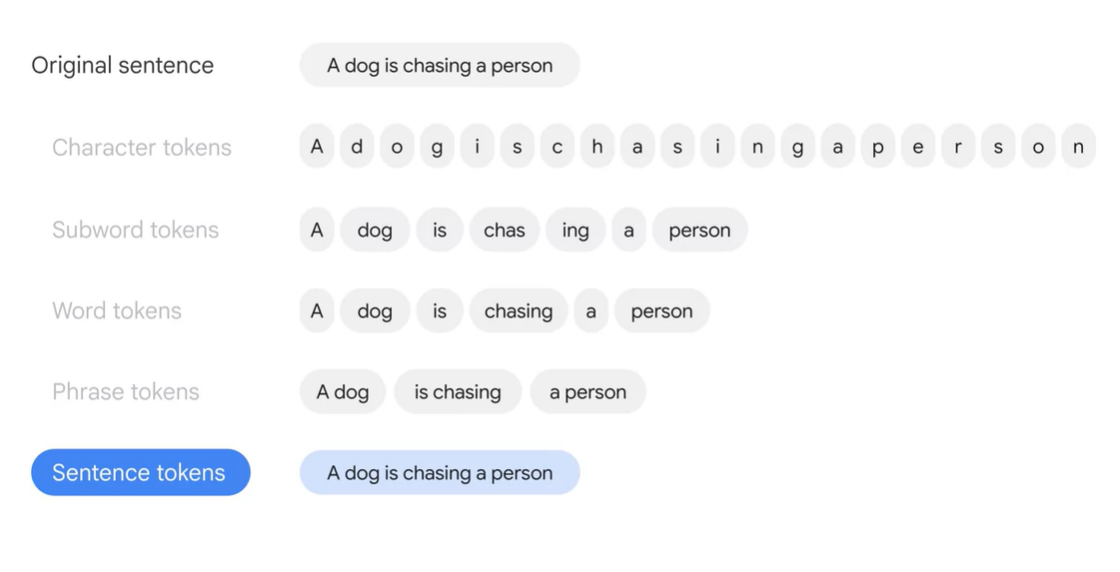


Like if we have a sentence "My name is Aurthor". So we tokanize it as:

My , name , is, Aurthor.

**Integenr Encoding:**

Then we give each word a number this number is given based on it's position in the vocabulary. so the list for this sentence will be suppose:

[9,1,3,7]

**Padding sequence:**

Now we will padd the sequences means we will make the length of each tokenized sentence which is integer encoded equal because we have to give it to our model. Than we will train it using Neural network.

**Keras Embedding Layer:**

We can make task specific embeddings using keras built=in embedding layer which takes these arguments:


1.   Number of unique words in vocubalory i.e vocuablary size
2.   Length of sequence

1.   Number of units in which you want to represent a word.

I am not going in extra detail of embedding we will discuss it in other tutorial here we have to teach easy way of using Reusable embeddings. But i will share the architecture.
Suppose we have 17 vocuablary size and we want to represent each word with two units than our model will conver each words interger encoding into one-hot vector of dimension 17 and fed into model in this way we will get a embedding of our sequence:

[ [x1,x2],
  [x3,x4],
  [x5,x6],
  [x7,x8] ]

So each word is represented by an embedding of size 2 and this is our embedding matrix.

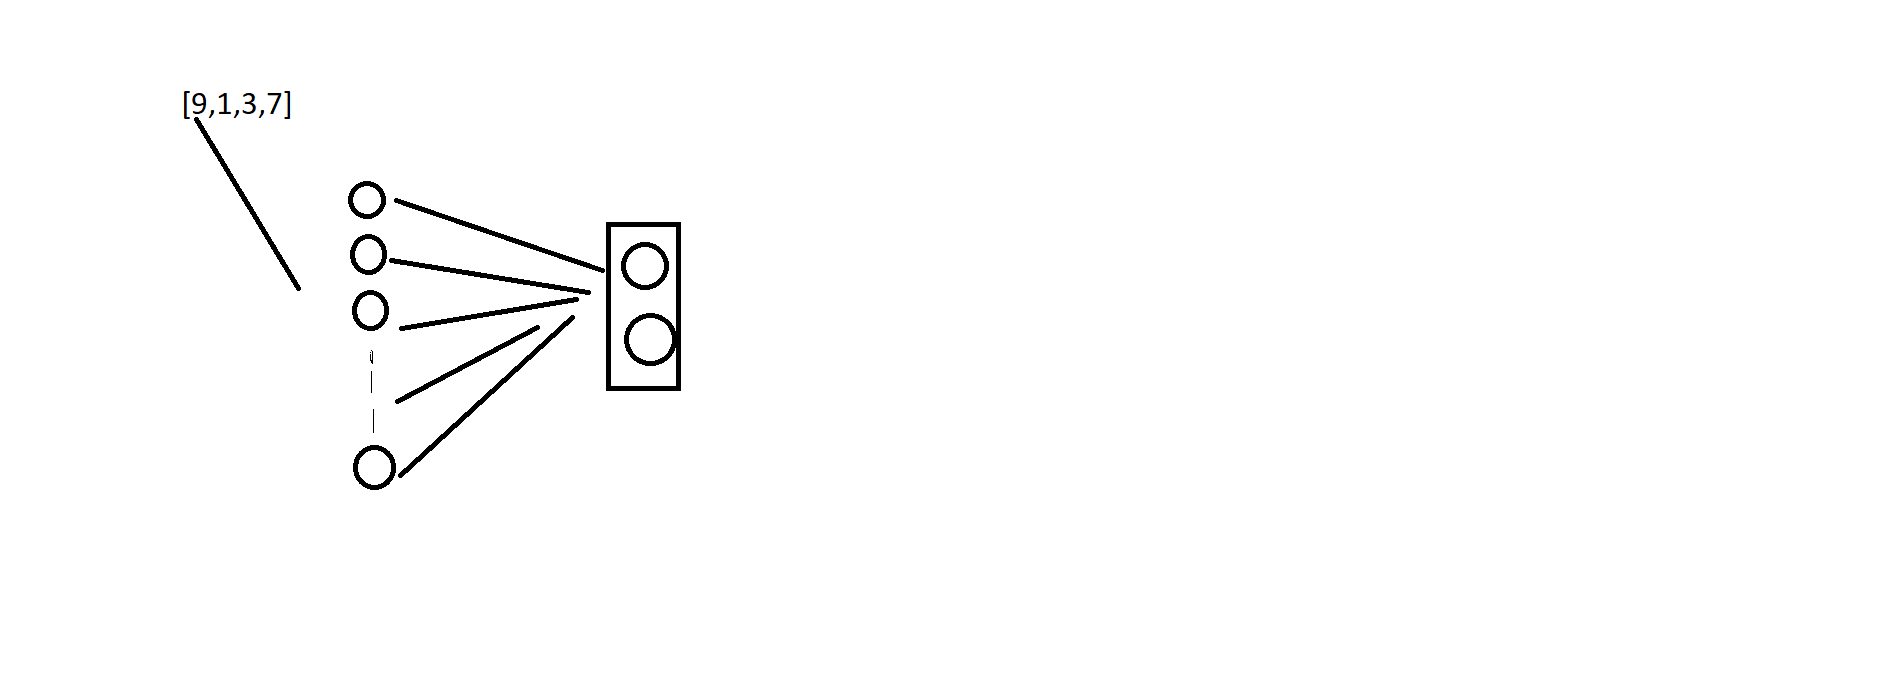











# 2:No numbers only Text:

Tensorflow hub is a library provided by tensorflow which has large variety of pretrained models. Embeddings itself are kind of transfer learning. With keras and tensorflow-hub using pretrained embeddings is now piece of cake we can do it in only 2 lines of code.



1.   One important advantage of using reusable embeddings is that we did not have to worry about preprocessing of our model means we can directly give raw text to our model. The embedding model will take care of preprocessing.
2.   Second advantage is this reusable embeddings are trained on a vary large corpus. So if we give our model a word which it has never seen in it's training process it can generalizez well it is because that embeddings carry semantic meanings which makes the model to generalize well overall.

**Process:**

To use reusable embeddings we first get the link of model from tensorflow hub and store it in a model. The reusable embeddings we are using here is "universal sentence encoder". We store it in a variable.



In [1]:
hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Making Embedding Layer:

Next we have a built-in class in tensorflow-hub known as "KerasLayer". This will take the following arguments:



1.   Link of model
2.   Input shape: In our case we don't have features we have text so input shape will be empty list.
1.   Data type: In our case it will be string as we are giving text
2.   Last one is trainable parameter depends upon you if you want to fine tune the model.

That's it our embedding layer is ready we can now use it as it is in our model throught Sequential or Functional API.
Check the syntax:





In [4]:
embedding_layer = hub.KerasLayer(
    hub_url,
    input_shape=[],
    dtype=tf.string,
    trainable=False
)

In [5]:
embeddings = embedding_layer(["How are you"])

# Explanation:

The pretrained model will output a 512 dimension embedding vector which is fed to our model this means we do not have to take care of preprocessing this means we can make embeddings in just two lines of code:

    hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

    embedding_layer = hub.KerasLayer(
    hub_url,
    input_shape=[],
    dtype=tf.string,
    trainable=False
    )

In [8]:
print(embeddings.shape)

(1, 512)


# Model:

I have trained a model for sentiment analysis on a small dataset to check performance

In [ ]:
data=pd.read_csv('/content/TF-HUB.xlsx')
X_train=data['Titles']
y_train=data['Labels']

In [ ]:
model=Sequential([
    embedding_layer,
    tf.keras.layers.Reshape((1, 512)),
    tf.keras.layers.SimpleRNN(128,return_sequences=True,activation='tanh'),
    tf.keras.layers.SimpleRNN(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
],name='TF-HUB')

In [ ]:
 model.compile(optimizer='adam',loss= tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6899 - accuracy: 0.4500
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6581 - accuracy: 0.9000
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6302 - accuracy: 0.9500
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6039 - accuracy: 0.9500
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 0.5779 - accuracy: 0.9500
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 0.5522 - accuracy: 0.9500
Epoch 7/10
1/1 [==============================] - 0s 18ms/step - loss: 0.5259 - accuracy: 0.9500
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 0.4990 - accuracy: 0.9500
Epoch 9/10
1/1 [==============================] - 0s 19ms/step - loss: 0.4716 - accuracy: 0.9500
Epoch 10/10
1/1 [==============================] - 0s 17ms/step - loss: 0.4443 - accuracy: 0.9500


In [ ]:
pred=model.predict(['This model lacks good results and good architecture'])
pred

1/1 [==============================] - 1s 884ms/step


array([[0.46520936]], dtype=float32)

In [ ]:
if pred>0.5:
  print("+ve")
else:
  print("-ve")

+ve


# Conclusion:

We can clearly see our model is generalized well on the words that it has never seen in training set and we have made embeddings very easily and do not use any large packages.